In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Create a path variable to the CSV file

df = pd.read_csv("netflix_titles.csv")

In [5]:
#Return the DataFrame

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
# You can also use info() to see if any columns show non-null counts less than total rows

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
## Summary stats for "df",include="all" shows stats on non-numeric columns like 'date'

df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [40]:
#Get the number of rows and columns

df.shape

(8807, 12)

In [13]:
#Get datatypes of each column

df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

### Data Cleaning

In [16]:
# 2. Check for missing values

df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [28]:
### Convert date

df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')

In [18]:
# Fill 'director' with 'Unknown'
df['director'] = df['director'].fillna('Unknown')

In [20]:
# Fill 'cast' with 'Not Available'
df['cast'] = df['cast'].fillna('Not Available')

In [22]:
# Fill 'country' with the most frequent country (mode)
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [30]:
# Fill 'date_added' with the median date
median_date = df['date_added'].dropna().median()
df['date_added'] = df['date_added'].fillna(median_date)

In [32]:
# Fill 'rating' with the most common rating
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [34]:
# Fill 'duration' with mode or 'Unknown'
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])

In [36]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [42]:
### Remove duplicates (if any)

df.drop_duplicates(inplace=True)

In [45]:
# Rename columns
df.rename(columns={
    'show_id': 'Id',
    'type': 'Content_type',
    'title': 'Title',
    'director': 'Director',
    'cast': 'Cast',
    'country': 'Country',
    'date_added': 'Date_added',
    'release_year': 'Release_year',
    'rating': 'Rating',
    'duration': 'Duration',
    'listed_in': 'Genres',
    'description': 'Description'
}, inplace=True)

In [47]:
# Drop columns (remove unwanted column)
df.drop(columns=['Description'], inplace=True)

# Added new column
df['year_added'] = pd.to_datetime(df['Date_added']).dt.year



In [165]:
#  Outlier Detection for Movie Duration and release year
movies_df = df[df['Content_type'] == 'Movie'].copy()
movies_df['Duration_minutes'] = movies_df['Duration'].str.extract('(\d+)').astype(float)

Q1 = movies_df['Duration_minutes'].quantile(0.25)
Q3 = movies_df['Duration_minutes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = movies_df[(movies_df['Duration_minutes'] < lower_bound) | (movies_df['Duration_minutes'] > upper_bound)]
print("Outlier count (Movie Duration):", outliers.shape[0])


Q1 = df['Release_year'].quantile(0.25)
Q3 = df['Release_year'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Release_year'] < lower_bound) | (df['Release_year'] > upper_bound)]
print("Outlier count Release year):", outliers.shape[0])




Outlier count (Movie Duration): 453
Outlier count Release year): 719


<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\nakeeb khan\AppData\Local\Temp\ipykernel_14084\757511144.py:3: SyntaxWarning: invalid escape sequence '\d'
  movies_df['Duration_minutes'] = movies_df['Duration'].str.extract('(\d+)').astype(float)


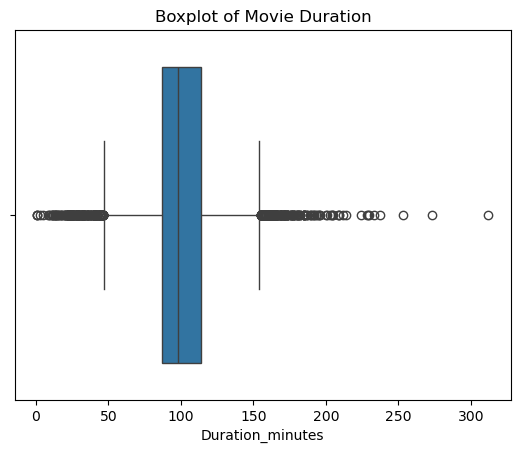

In [173]:
### Show outliers through boxplot

sns.boxplot(data=movies_df, x='Duration_minutes')
plt.title("Boxplot of Movie Duration")
plt.show()

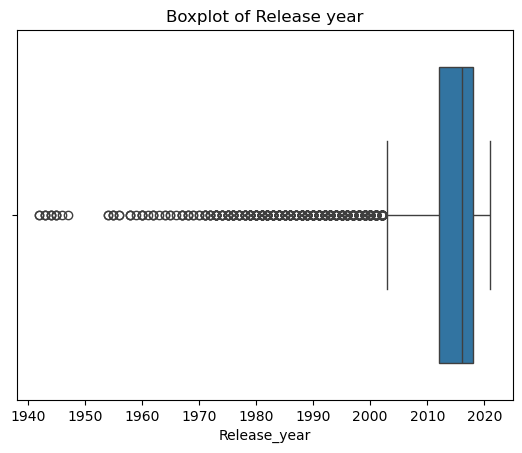

In [171]:
sns.boxplot(data=movies_df, x='Release_year')
plt.title("Boxplot of Release year")
plt.show()

In [161]:
df.head()

,Id,Content_type,Title,Director,Cast,Country,Date_added,Release_year,Rating,Duration,Genres,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not Available,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021


### Exploratory Data Analysis (EDA)

#### 1. Content Type Distribution (Movies vs TV Shows)


C:\Users\nakeeb khan\AppData\Local\Temp\ipykernel_14084\2699028253.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Content_type', palette='Set2')


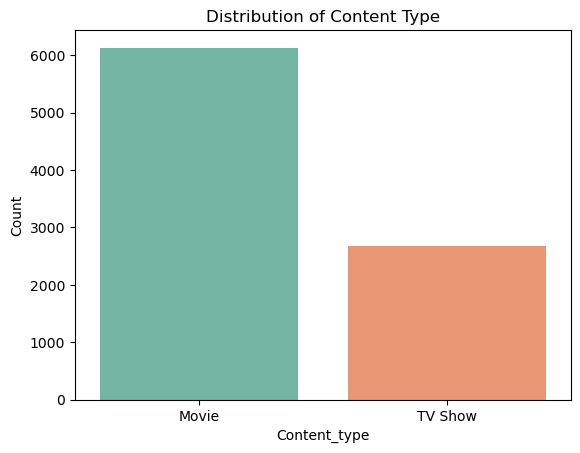

In [70]:
sns.countplot(data=df, x='Content_type', palette='Set2')
plt.title("Distribution of Content Type")
plt.xlabel("Content_type")
plt.ylabel("Count")
plt.show()

#### 2. Number of Titles Released Each Year

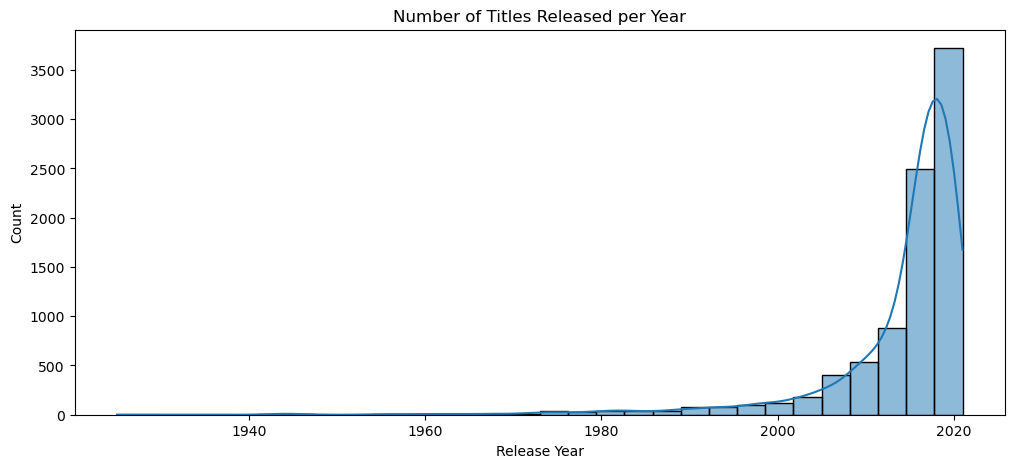

In [73]:
plt.figure(figsize=(12,5))
sns.histplot(data=df, x='Release_year', bins=30, kde=True)
plt.title("Number of Titles Released per Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

#### 3. Content Added to Netflix Over the Years



C:\Users\nakeeb khan\AppData\Local\Temp\ipykernel_14084\2598658220.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year_added', palette='coolwarm')


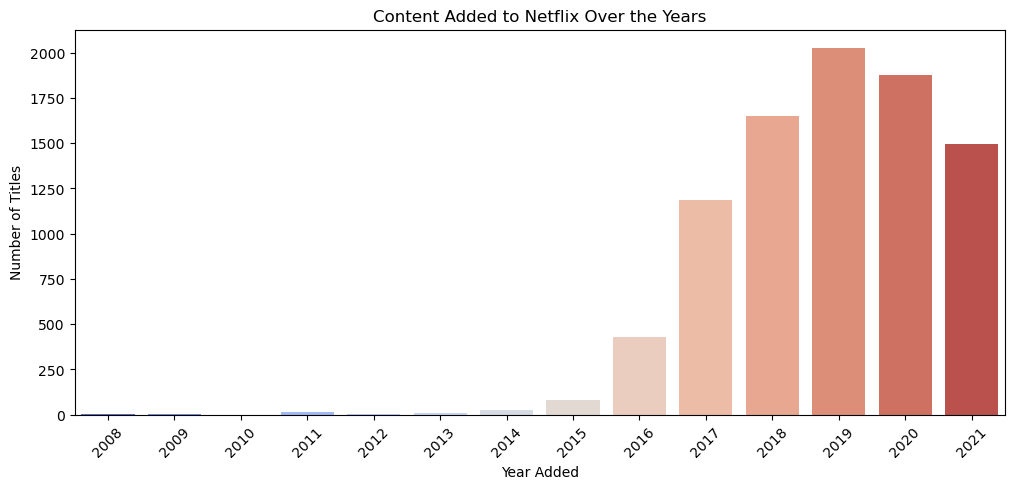

In [82]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='year_added', palette='coolwarm')
plt.title("Content Added to Netflix Over the Years")
plt.xticks(rotation=45)
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()

#### 4. Top 10 Countries with Most Titles

In [84]:
top_countries = df['Country'].value_counts().head(10)

In [88]:
print(top_countries)

Country
United States     3649
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


C:\Users\nakeeb khan\AppData\Local\Temp\ipykernel_14084\2755683971.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')


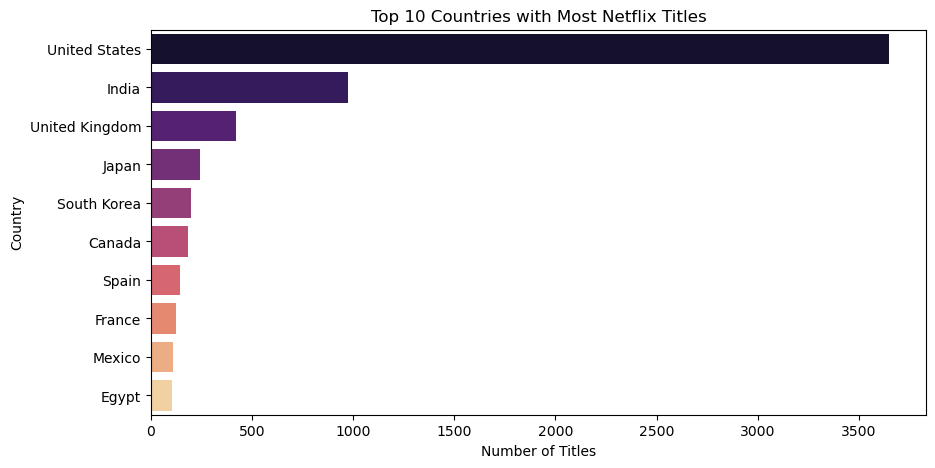

In [91]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title("Top 10 Countries with Most Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

#### Most Common  Ratings



C:\Users\nakeeb khan\AppData\Local\Temp\ipykernel_14084\3573459984.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Rating', order=df['Rating'].value_counts().index, palette='pastel')


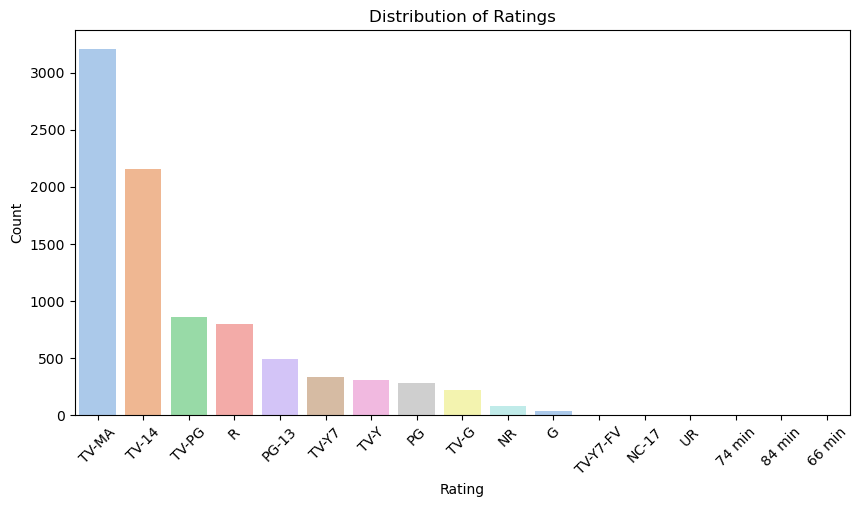

In [99]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Rating', order=df['Rating'].value_counts().index, palette='pastel')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### 6. Most Frequent Genres

C:\Users\nakeeb khan\AppData\Local\Temp\ipykernel_14084\3745044372.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_genres.values()), y=list(top_genres.keys()), palette='viridis')


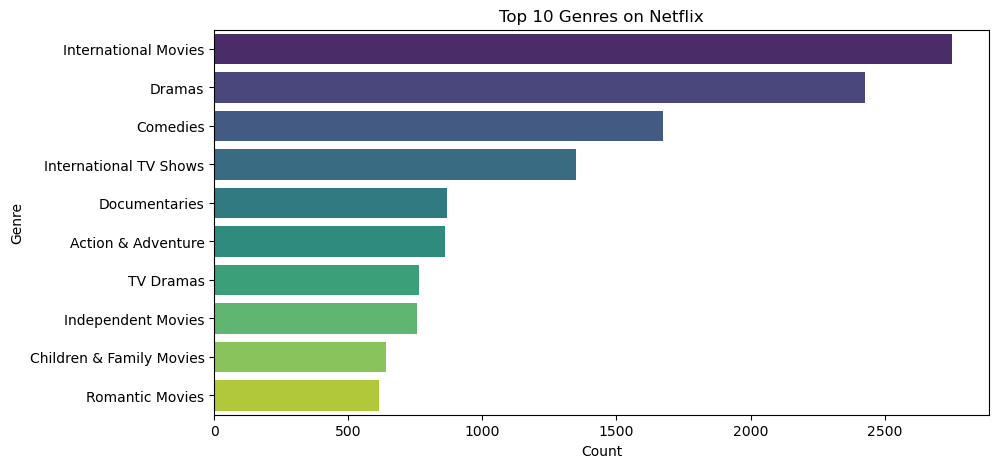

In [109]:
# Split multiple genres and count
from collections import Counter

all_genres = ','.join(df['Genres'].dropna()).split(',')
genre_counts = Counter([genre.strip() for genre in all_genres])
top_genres = dict(Counter(genre_counts).most_common(10))


plt.figure(figsize=(10,5))
sns.barplot(x=list(top_genres.values()), y=list(top_genres.keys()), palette='viridis')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

#### Movie Duration Distribution


<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\nakeeb khan\AppData\Local\Temp\ipykernel_14084\387832888.py:3: SyntaxWarning: invalid escape sequence '\d'
  movies_df['duration_minutes'] = movies_df['Duration'].str.extract('(\d+)').astype(float)


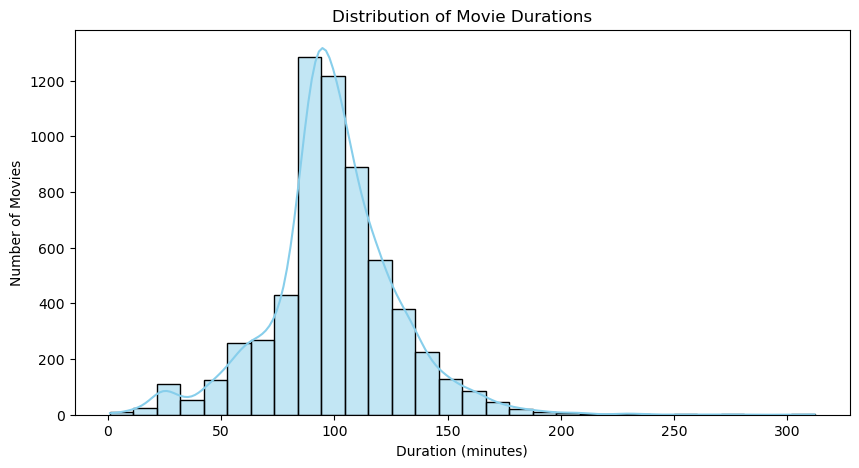

In [128]:
# Filter Movies
movies_df = df[df['Content_type'] == 'Movie'].copy()
movies_df['duration_minutes'] = movies_df['Duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10,5))
sns.histplot(movies_df['duration_minutes'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.show()


#### TV Show Season Distribution

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\nakeeb khan\AppData\Local\Temp\ipykernel_14084\2159954815.py:2: SyntaxWarning: invalid escape sequence '\d'
  tv_df['seasons'] = tv_df['Duration'].str.extract('(\d+)').astype(float)
C:\Users\nakeeb khan\AppData\Local\Temp\ipykernel_14084\2159954815.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=tv_df['seasons'], palette='cubehelix')


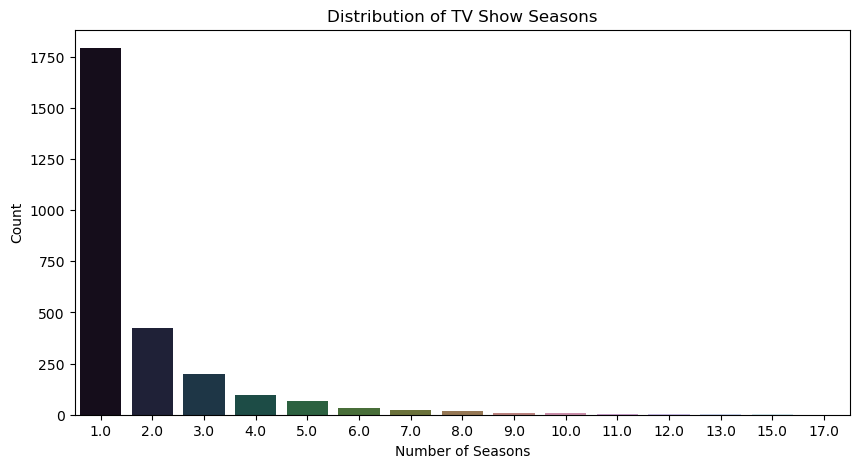

In [131]:
tv_df = df[df['Content_type'] == 'TV Show'].copy()
tv_df['seasons'] = tv_df['Duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10,5))
sns.countplot(x=tv_df['seasons'], palette='cubehelix')
plt.title("Distribution of TV Show Seasons")
plt.xlabel("Number of Seasons")
plt.ylabel("Count")
plt.show()

#### 9. Top Directors with Most Titles


C:\Users\nakeeb khan\AppData\Local\Temp\ipykernel_14084\661998577.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues')


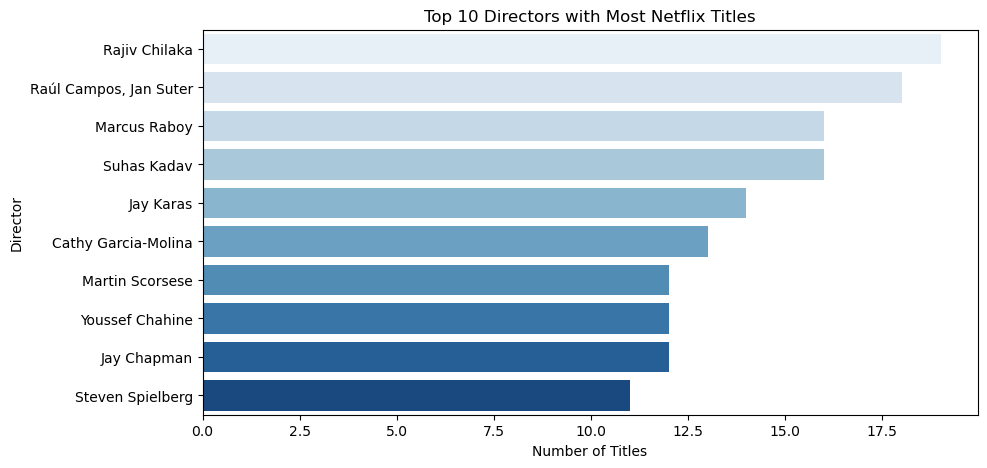

In [134]:
top_directors = df[df['Director'] != 'Unknown']['Director'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues')
plt.title("Top 10 Directors with Most Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()

#### How Netflix Content Has Grown Over Time

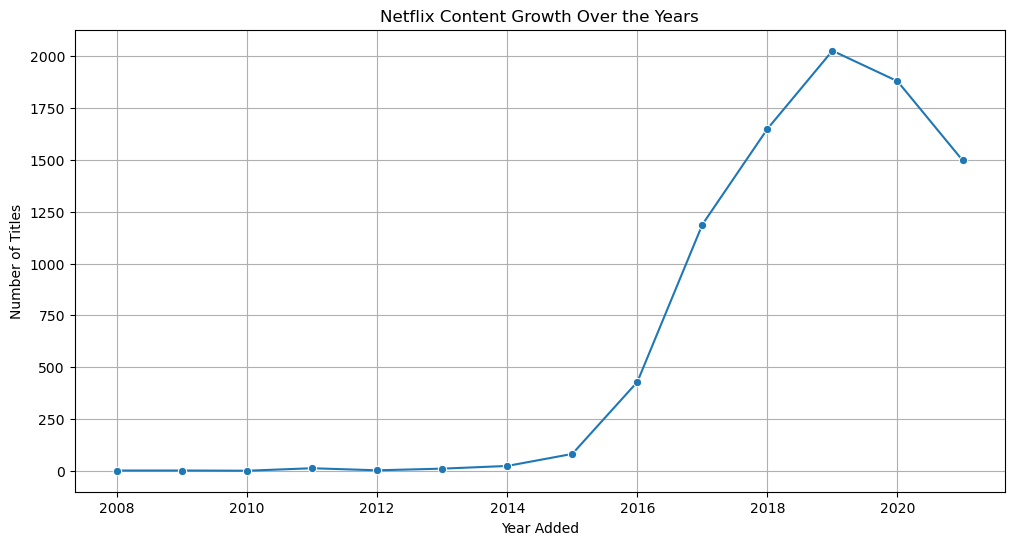

In [138]:
content_by_year = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=content_by_year.index, y=content_by_year.values, marker='o')
plt.title("Netflix Content Growth Over the Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()

In [175]:
df.head()

,Id,Content_type,Title,Director,Cast,Country,Date_added,Release_year,Rating,Duration,Genres,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not Available,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021
